!pip install pandas

In [9]:
import pandas as pd
left_frame = pd.DataFrame({'key': range(5), 'left_value':['a','b','c','d','e']})
right_frame = pd.DataFrame({'key': range(2,7), 'right_value':['f','g','h','i','j']})

print(left_frame)
print('\n')
print(right_frame)

   key left_value
0    0          a
1    1          b
2    2          c
3    3          d
4    4          e


   key right_value
0    2           f
1    3           g
2    4           h
3    5           i
4    6           j


In [13]:
pd.merge(left_frame, right_frame, on='key', how='inner')

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h


In [14]:
pd.merge(left_frame, right_frame, on='key', how='left')


,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h


In [15]:
pd.merge(left_frame, right_frame, on='key', how='right')


,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h
3,5,NaN,i
4,6,NaN,j


In [16]:
pd.merge(left_frame, right_frame, on='key', how='outer') 

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h
5,5,NaN,i
6,6,NaN,j


In [17]:
pd.concat([left_frame, right_frame], axis=1)

,key,left_value,key,right_value
0,0,a,2,f
1,1,b,3,g
2,2,c,4,h
3,3,d,5,i
4,4,e,6,j


In [18]:
pd.concat([left_frame, right_frame])

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,NaN
3,3,d,NaN
4,4,e,NaN
0,2,NaN,f
1,3,NaN,g
2,4,NaN,h
3,5,NaN,i
4,6,NaN,j


In [19]:
import pandas as pd
import numpy as np

In [23]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('Session-2-Python-u.user', sep='|', names=u_cols, encoding='latin-1')

m_cols = ['movie_id', 'title', 'release_date', 'video_release_date','imdb_url']
movies = pd.read_csv('Session-2-Python-u.item', sep='|', names=m_cols, usecols=range(5), encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('Session-2-Python-u.data', sep='\t', names=r_cols, encoding='latin-1')

In [24]:
print(ratings.shape)
print(users.head())
print(users.dtypes)
print(users.describe())

(100000, 4)
   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213
user_id        int64
age            int64
sex           object
occupation    object
zip_code      object
dtype: object
          user_id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000


In [25]:
movies[['movie_id','title']].head()


users[users.age<40].tail(10)


users[(users.age<40) & (users.sex=='F')].tail(3)


users.dtypes

user_id        int64
age            int64
sex           object
occupation    object
zip_code      object
dtype: object

In [26]:
#merge the data
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)


lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


In [27]:
lens.title.value_counts()[:15]

Star Wars (1977)                    583
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Name: title, dtype: int64

In [29]:
highest_ratings = lens.groupby('title').agg({'rating':[np.size,np.mean]})
highest_ratings.head(10)

rating          
                                              size      mean
title                                                       
'Til There Was You (1997)                        9  2.333333
1-900 (1994)                                     5  2.600000
101 Dalmatians (1996)                          109  2.908257
12 Angry Men (1957)                            125  4.344000
187 (1997)                                      41  3.024390
2 Days in the Valley (1996)                     93  3.225806
20,000 Leagues Under the Sea (1954)             72  3.500000
2001: A Space Odyssey (1968)                   259  3.969112
3 Ninjas: High Noon At Mega Mountain (1998)      5  1.000000
39 Steps, The (1935)                            59  4.050847

In [31]:
highest_ratings.sort_values([('rating','mean')], ascending=False).head()

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

In [32]:
most_rated = lens.groupby('title').size()
most_rated

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Length: 1664, dtype: int64

In [34]:
atleast_200 = highest_ratings['rating']['size'] >=200
highest_ratings[atleast_200].sort_values([('rating','mean')], ascending=False)[:10]

rating          
                                         size      mean
title                                                  
Schindler's List (1993)                   298  4.466443
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
Godfather, The (1972)                     413  4.283293

In [36]:
atleast_200 = highest_ratings['rating']['size'] >=200
highest_ratings[atleast_200].sort_values([('rating','mean')], ascending=False).tail(10)

rating          
                          size      mean
title                                   
Liar Liar (1997)           485  3.156701
Eraser (1996)              206  3.150485
Saint, The (1997)          316  3.123418
Devil's Own, The (1997)    240  3.108333
Murder at 1600 (1997)      218  3.087156
Broken Arrow (1996)        254  3.031496
Evita (1996)               259  2.980695
Dante's Peak (1997)        240  2.933333
Mars Attacks! (1996)       217  2.847926
Volcano (1997)             219  2.808219

In [46]:
lens.groupby('age_group').agg({'rating':[np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

In [37]:
import natplotlib.pyplot as plt

ModuleNotFoundError: No module named 'natplotlib'

In [38]:
!pip install matplotlib

You should consider upgrading via the 'c:\users\pullu\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [40]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'count of users')

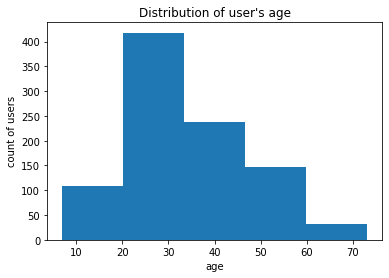

In [42]:
plt.hist(users.age, bins=5)
plt.title("Distribution of user's age")

plt.xlabel("age")
plt.ylabel("count of users")

In [43]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0,81, 10), right = False, labels=labels)
lens['age_group'].head(n=200)

0      60-69
1      60-69
2      60-69
3      60-69
4      60-69
       ...  
195    60-69
196    60-69
197    60-69
198    60-69
199    60-69
Name: age_group, Length: 200, dtype: category
Categories (8, object): ['0-9' < '10-19' < '20-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70-79']

In [56]:
lens.set_index('movie_id', inplace = True)

In [53]:
most_100 = lens.groupby('movie_id').size()[:100]

In [57]:
by_age = lens.loc[most_100.index].groupby(['title','age_group'])
by_age.rating.mean().head(20)

title                              age_group
Ace Ventura: Pet Detective (1994)  0-9               NaN
                                   10-19        3.100000
                                   20-29        3.089286
                                   30-39        3.086957
                                   40-49        2.636364
                                   50-59        3.000000
                                   60-69        4.000000
                                   70-79             NaN
Aladdin (1992)                     0-9               NaN
                                   10-19        3.840000
                                   20-29        3.820000
                                   30-39        3.847458
                                   40-49        3.769231
                                   50-59        3.571429
                                   60-69        3.500000
                                   70-79             NaN
Angels and Insects (1995)          0-9     

In [58]:
by_age.rating.mean().unstack(1).fillna(0)[10:20]

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
"Birdcage, The (1996)",0.0,3.217391,3.413223,3.514286,3.500000,3.346154,3.888889,0.0
Blade Runner (1982),0.0,3.400000,4.134454,4.211765,4.147059,4.136364,4.400000,0.0
Braveheart (1995),0.0,4.384615,4.194915,4.156627,4.051282,3.956522,3.714286,4.0
Brother Minister: The Assassination of Malcolm X (1994),0.0,0.000000,3.333333,0.000000,2.500000,0.000000,0.000000,0.0
"Brothers McMullen, The (1995)",0.0,3.750000,3.529412,3.333333,3.375000,3.000000,4.500000,3.0
Carlito's Way (1993),0.0,4.500000,3.538462,3.200000,3.750000,3.000000,2.000000,0.0
Clerks (1994),0.0,4.727273,3.825000,3.750000,3.250000,3.333333,4.333333,3.0
Copycat (1995),0.0,3.400000,3.243243,3.333333,3.285714,3.333333,3.500000,0.0
Crimson Tide (1995),0.0,3.833333,3.492537,3.708333,3.750000,3.900000,3.400000,0.0


In [ ]:
lens.reset_index('movie_id', inplace = True)

In [60]:
pivoted = lens.pivot_table(index=['movie_id','title'],
                    columns=['sex'],
                values='rating', #this is be default rating
                fill_value=0)
pivoted.head(n=20)

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625
6,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),3.600000,3.571429
7,Twelve Monkeys (1995),3.560976,3.861290
8,Babe (1995),4.050000,3.974843
9,Dead Man Walking (1995),3.927711,3.884259


In [69]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

sex,movie_id,F,M,diff
title,,,,
Toy Story (1995),1,3.789916,3.909910,0.119994
GoldenEye (1995),2,3.368421,3.178571,-0.189850
Four Rooms (1995),3,2.687500,3.108108,0.420608
Get Shorty (1995),4,3.400000,3.591463,0.191463
Copycat (1995),5,3.772727,3.140625,-0.632102


In [75]:
pivoted.reset_index('movie_id', inplace = True)

KeyError: 'Requested level (movie_id) does not match index name (title)'

In [71]:
disagreements = pivoted[pivoted.movie_id.isin(most_100.index)]['diff']
disagreements.head(n=20)


title
Toy Story (1995)                                        0.119994
GoldenEye (1995)                                       -0.189850
Four Rooms (1995)                                       0.420608
Get Shorty (1995)                                       0.191463
Copycat (1995)                                         -0.632102
Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)   -0.028571
Twelve Monkeys (1995)                                   0.300315
Babe (1995)                                            -0.075157
Dead Man Walking (1995)                                -0.043452
Richard III (1995)                                      0.169565
Seven (Se7en) (1995)                                    0.095268
Usual Suspects, The (1995)                              0.065728
Mighty Aphrodite (1995)                                 0.208042
Postino, Il (1994)                                      0.109091
Mr. Holland's Opus (1995)                              -0.244160
French Twist (Gazon

In [72]:
disagreements.describe()

count    100.000000
mean      -0.015862
std        0.447895
min       -2.333333
25%       -0.178594
50%       -0.013110
75%        0.198015
max        1.428571
Name: diff, dtype: float64

In [73]:
disagree = disagreements.copy()
disagree_sorted = disagree.sort_values()
disagree_sorted.head()

title
Faster Pussycat! Kill! Kill! (1965)                       -2.333333
Free Willy 2: The Adventure Home (1995)                   -1.133333
Robert A. Heinlein's The Puppet Masters (1994)            -0.964286
Free Willy (1993)                                         -0.818182
To Wong Foo, Thanks for Everything! Julie Newmar (1995)   -0.778378
Name: diff, dtype: float64

Text(0, 0.5, 'Title (of Movie)')

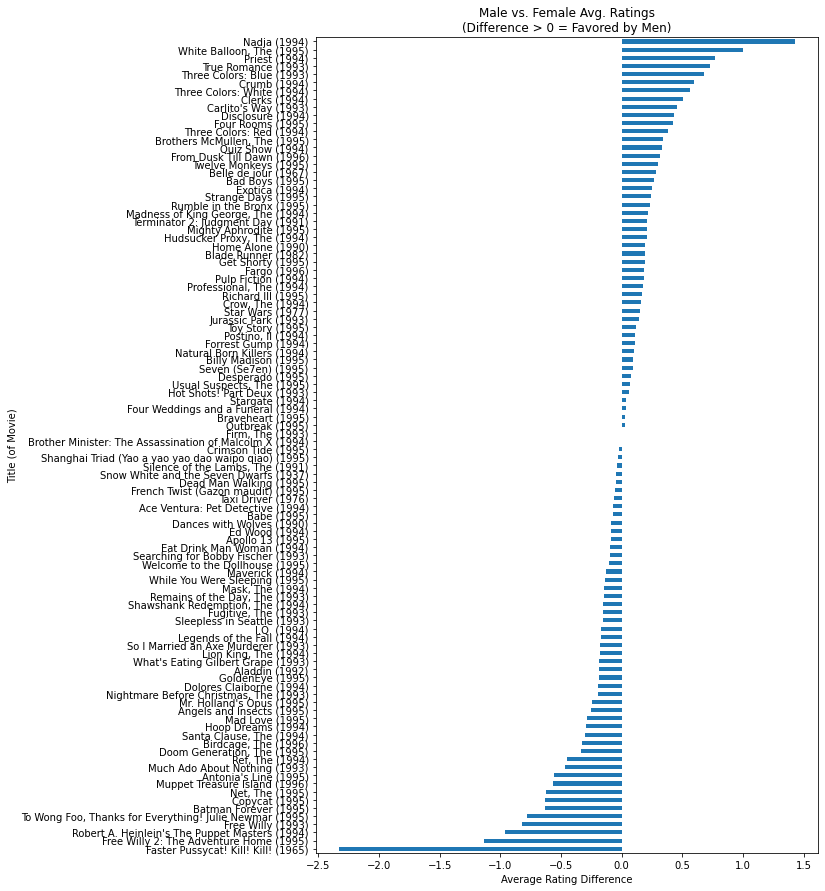

In [74]:
disagree_sorted.plot(kind='barh', figsize = [9,15])

plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.xlabel("Average Rating Difference")
plt.ylabel("Title (of Movie)")

In [76]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import pandas as pd
import numpy as np

In [77]:
data = pd.read_csv('titanic-train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [80]:
data['Age'].fillna(data['Age'].median(),inplace=True)

In [81]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()

print(survived_sex)
print(dead_sex)

female    233
male      109
Name: Sex, dtype: int64
male      468
female     81
Name: Sex, dtype: int64


In [83]:
df = pd.DataFrame([survived_sex, dead_sex])
df.index = ['Survived', 'Dead']
df

,female,male
Survived,233,109
Dead,81,468


<AxesSubplot:>

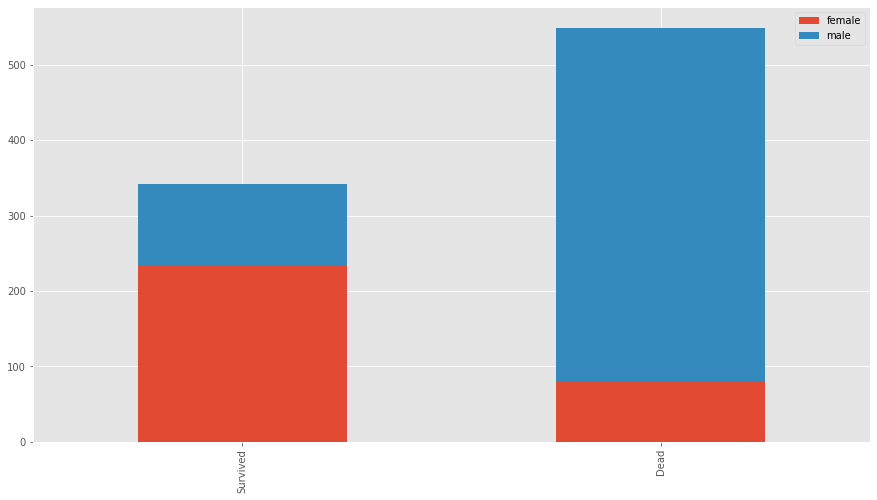

In [84]:
df = pd.DataFrame([survived_sex, dead_sex])
df.index = ['Survived', 'Dead']


df.plot(kind = 'bar', stacked=True, figsize=(15,8))

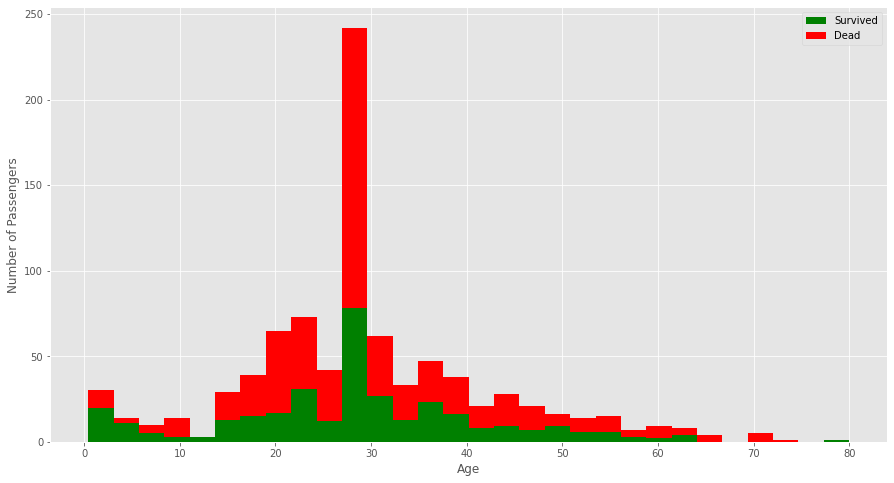

In [85]:
#How about survival and age

figure = plt.figure(figsize=(15,8))


plt.hist([data[data['Survived']==1]['Age'],data[data['Survived']==0]['Age']], stacked=True, color = ['g', 'r'],
bins=30, label = ['Survived','Dead'])


plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()

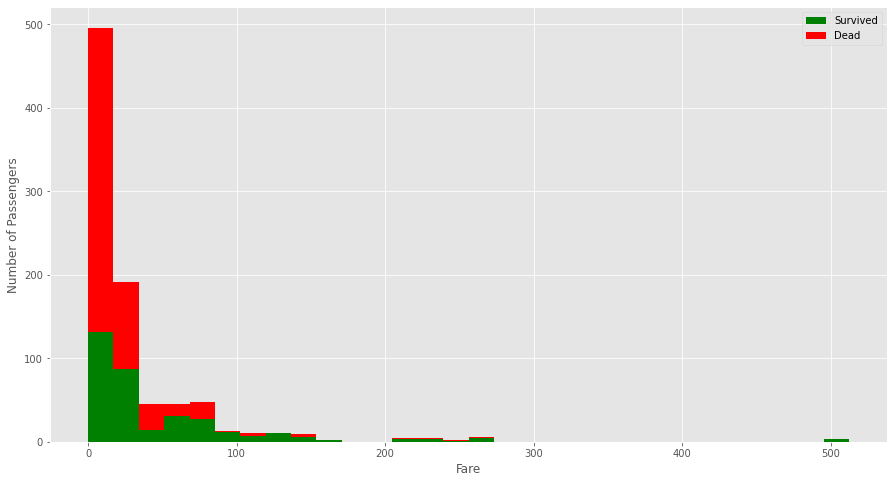

In [86]:
#How about survival and age

figure = plt.figure(figsize=(15,8))


plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']], stacked=True, color = ['g', 'r'],
bins=30, label = ['Survived','Dead'])


plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend()

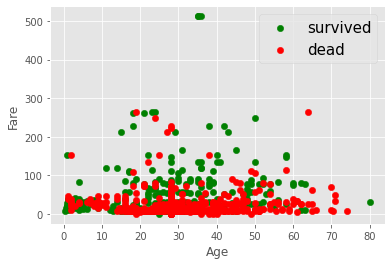

In [87]:
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Fare'],c='green', s=40)
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],c='red', s=40)


ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived', 'dead'), scatterpoints=1, loc = 'upper right',fontsize=15)

<AxesSubplot:xlabel='Pclass', ylabel='Average Fare'>

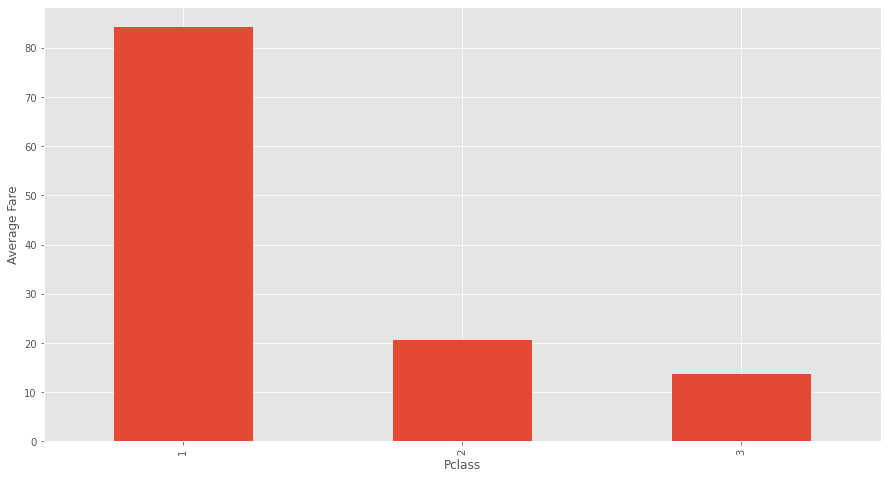

In [88]:
ax = plt.subplot()
ax.set_ylabel('Average Fare')

data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(15,8), ax = ax)